<a href="https://colab.research.google.com/github/smarvar/Machine-Learnig-practice/blob/master/TP6/TP6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predecir retrasos en los vuelos**


El objetivo de este proyecto es construir un modelo capaz de predecir retrasos de vuelos en el mes de enero. Tómese un tiempo para comprender los datos, ¿qué aerolíneas tienen el mayor porcentaje de vuelos retrasados? ¿Qué aeropuertos tienen el mayor porcentaje de vuelos retrasados? ¿Existe alguna relación entre la distancia y el retraso? Más información sobre estos datos aquí

In [51]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectFD/data/jan_2019_ontime.csv")
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,10397,1039707,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,11193,1119302,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,11193,1119302,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,10397,1039707,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,11778,1177801,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


Antes de aplicar cualquier modelo, vamos a realizar un analisis de los atributos. Para asi definir si todos harán parte del entrenamiento del modelo y a su vez ver si existen anomalias en el dataset.

In [248]:
df.describe()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEP_TIME,DEP_DEL15,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
count,583985.000000,583985.000000,583985.000000,583985.000000,583985.000000,5.839850e+05,583985.000000,5.839850e+05,567633.000000,567630.000000,566924.000000,565963.000000,583985.000000,583985.000000,583985.000000,0.0
mean,15.960088,3.835626,19983.213168,2537.869334,12659.701982,1.265974e+06,12659.470015,1.265951e+06,1331.957814,0.174281,1484.315921,0.185917,0.028641,0.002219,797.742767,NaN
std,8.987942,1.921899,377.724638,1821.736145,1519.405493,1.519403e+05,1519.336466,1.519334e+05,495.404020,0.379351,523.162855,0.389040,0.166796,0.047056,589.999261,NaN
min,1.000000,1.000000,19393.000000,1.000000,10135.000000,1.013505e+06,10135.000000,1.013505e+06,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,31.000000,NaN
25%,8.000000,2.000000,19790.000000,979.000000,11292.000000,1.129202e+06,11292.000000,1.129202e+06,921.000000,0.000000,1104.000000,0.000000,0.000000,0.000000,363.000000,NaN
50%,16.000000,4.000000,19977.000000,2114.000000,12889.000000,1.288903e+06,12889.000000,1.288903e+06,1328.000000,0.000000,1517.000000,0.000000,0.000000,0.000000,640.000000,NaN
75%,24.000000,5.000000,20368.000000,3902.000000,13931.000000,1.393102e+06,13931.000000,1.393102e+06,1738.000000,0.000000,1919.000000,0.000000,0.000000,0.000000,1037.000000,NaN
max,31.000000,7.000000,20452.000000,7439.000000,16218.000000,1.621802e+06,16218.000000,1.621802e+06,2400.000000,1.000000,2400.000000,1.000000,1.000000,1.000000,4983.000000,NaN


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           583985 non-null  int64  
 1   DAY_OF_WEEK            583985 non-null  int64  
 2   OP_UNIQUE_CARRIER      583985 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  583985 non-null  int64  
 4   OP_CARRIER             583985 non-null  object 
 5   TAIL_NUM               581442 non-null  object 
 6   OP_CARRIER_FL_NUM      583985 non-null  int64  
 7   ORIGIN_AIRPORT_ID      583985 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  583985 non-null  int64  
 9   ORIGIN                 583985 non-null  object 
 10  DEST_AIRPORT_ID        583985 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    583985 non-null  int64  
 12  DEST                   583985 non-null  object 
 13  DEP_TIME               567633 non-null  float64
 14  DEP_DEL15              567630 non-nu

In [250]:
len_dataset = len(df)
print('Número de datos Dataset original: ' +str(len_dataset))
print('Número de vuelos retrasados de Salida:  %i' %(len(df[df.DEP_DEL15 == 1])))
print('Porcentaje vuelos retrasados de Salida: %.2f' %(len(df[df.DEP_DEL15 == 1])*100/len_dataset))
print('Número de vuelos retrasados de Llegada:  %i' %(len(df[df.ARR_DEL15 == 1])))
print('Porcentaje vuelos retrasados de Llegada: %.2f' %(len(df[df.ARR_DEL15 == 1])*100/len_dataset))

Número de datos Dataset original: 583985
Numero de vuelos retrasados de Salida:  98927
Porcentaje vuelos retrasados de Salida: 16.94
Numero de vuelos retrasados de Llegada:  105222
Porcentaje vuelos retrasados de Llegada: 18.02


In [244]:
# Identificamos la aerolinea con mayor numero de retrazos siendo el indicador de retrazo DEP_DEL15
# Que cuantifica si una aerolinea tuvo mas de 15 minutos de retraso antes de despegar
print('Aerolinea %Retrasos')
df.OP_CARRIER_AIRLINE_ID[(df.DEP_DEL15 == 1)].value_counts()*100/len(df[df.DEP_DEL15 == 1])

Aerolinea %Retrasos


19393    18.738657
20304    12.815209
19805    12.228137
19790     9.580735
19977     8.503929
20409     6.433460
20452     4.871990
20398     4.771610
20363     3.789100
20397     3.355133
20378     2.947529
19930     2.792395
20366     2.555133
20436     2.363498
20416     2.199240
20368     1.461090
19690     0.593156
Name: OP_CARRIER_AIRLINE_ID, dtype: float64

In [245]:
#Identificamos el aeropuerto con mayor numero de retrasos 
print('Aeropuerto %Retrasos')
df.ORIGIN_AIRPORT_ID[(df.DEP_DEL15 == 1)].value_counts().sort_values(ascending=False)*100/len(df[df.DEP_DEL15 == 1])

Aeropuerto %Retrasos


13930    6.685932
10397    4.185551
11298    4.095311
12953    3.833714
11292    3.472750
           ...   
13127    0.002028
10165    0.002028
11525    0.002028
11537    0.001014
15074    0.001014
Name: ORIGIN_AIRPORT_ID, Length: 345, dtype: float64

In [176]:
#Verificamos la relación entre la distacia y los vuelos retrasados
print('Distancia %Retrasos')
df.DISTANCE[(df.DEP_DEL15 == 1)].value_counts().sort_values(ascending=False)*100/len(df[df.DEP_DEL15 == 1])

Distancia %Retrasos


733.0     0.907864
337.0     0.867142
296.0     0.615623
184.0     0.531783
214.0     0.489464
            ...   
1343.0    0.000798
1894.0    0.000798
1571.0    0.000798
1479.0    0.000798
1077.0    0.000798
Name: DISTANCE, Length: 1440, dtype: float64

El analisis inicial con respecto a los retrasos de los vuelos indico que: El vuelo de la Aerolinea con ID 19393 es la que mayor numero de retrasos representa con un 18.7% de los mismos. A su vez el aeropuerto con mayor número de retrasos es el ID: 13930 con un 6.69% de vuelos retrazados. En relación a la distacia los resultados indican que suelen presentarse mayores retrasos en los vuelos de corta distancia, siendo claramente los vuelos de corta distancia los que menor porcentaje de retraso presentan.

 **Analisis general del Dataset**

---

Preliminarmente puede verse como existen algunos atributos que no contienen la cantidad total de datos que para este caso es de 583985, lo cual indica que pueden tener valores nan, non-null, los cuales habra que depurar. Asi mismo se observa un atributo Unnamed el cual no aporta ninguna informacón, por lo cual ser el primer de los atributos a eliminar del dataset. Con respuecto al tipo de dato puede verse que el dataset esta compuesto de valores categoricos y numericos, por lo cual habrá que determinar como generalizar el dataset a un mismo tipo. 

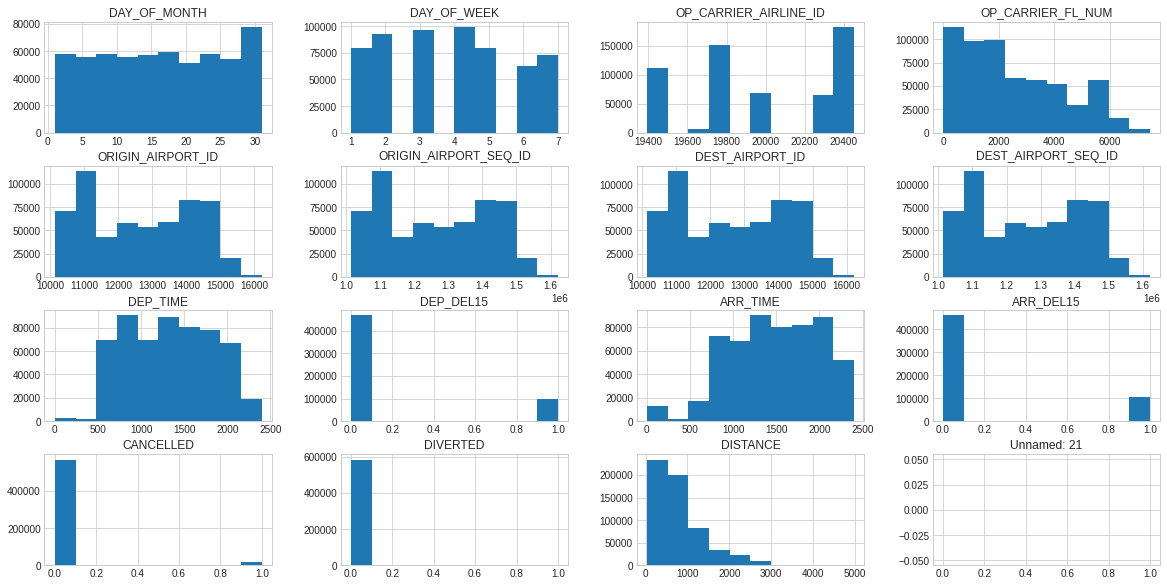

In [48]:
# Visualizamos de forma general mediante un histograma individual de cada atributo
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style

style.use('seaborn-whitegrid') or plt.style.use('seaborn-whitegrid') 
df.hist(figsize=(20,10))
plt.show()

Analizando los histogramas de los atributos asi como la tabla de datos puede concluirse lo siguiente: El atributo ORIGIN_AIRPORT_ID y ORIGIN_AIRPORT_SEQ_ID, son basicamente lo mismo, solo cambian en un codigo adicional de 3 digitos que le suman a SEQ_ID. lo mismo sucede con DEST_AIRPORT_ID y DEST_AIRPORT_SEQ_ID; por lo cual solo se tomara el primero de cada uno de estos ya que seria info redundante en el dataset. Asi mismo el atributo OP_UNIQUE_CARRIER, OP_CARRIER y OP_CARRIER_AIRLINE_ID son el mismo dato siendo el primero alfanumerico, por lo cual nos quedaremos con el segundo. 

In [52]:
# Eliminamos las feautures que no son reelevantes
df = df.drop(['OP_UNIQUE_CARRIER', 'OP_CARRIER', 'ORIGIN_AIRPORT_SEQ_ID','DEST_AIRPORT_SEQ_ID','DIVERTED','ORIGIN','DEST','TAIL_NUM','ARR_DEL15','Unnamed: 21'], axis=1)

In [53]:
# Verificamos el minimo rago horario y el maximo de la variable DEP_TIME_BLK
print(df['DEP_TIME_BLK'].min())
print(df['DEP_TIME_BLK'].max())

0001-0559
2300-2359


In [54]:
# Con lo cual se Observa que existe un intervalo horario en el que posiblemente no hay vuelos que seria entre
# 0001-0559 Hs, lo cual indica que el primer vuelo sale desde las 05Hs en adelante, con lo cual fijaremos como 
# minimo rango 0500-0559Hs
df.loc[df['DEP_TIME_BLK'] == '0001-0559', 'DEP_TIME_BLK'] = '0500-0559'
df['DEP_TIME_BLK'].min()

'0500-0559'

In [55]:
#remplazamos los rangos por un hora fija la cual indica que se hace referencia  a la hora cuyo rango es de 60 minutos
#ej: 0500-0559 = 5
h_range = ['0500-0559', '0600-0659', '0700-0759', '0800-0859', '0900-0959', '1000-1059', '1100-1159', '1200-1259',
'1300-1359', '1400-1459', '1500-1559', '1600-1659', '1700-1759', '1800-1859', '1900-1959','2000-2059', '2100-2159', 
'2200-2259', '2300-2359']
reemplace = 5
for a in h_range:
  df.loc[df['DEP_TIME_BLK'] == a, 'DEP_TIME_BLK'] = reemplace
  reemplace += 1 

In [56]:
# Verificamos cuales atributos tienen valores nan, para limpiar el dataset
df.columns[df.isna().sum() != 0]

Index(['DEP_TIME', 'DEP_DEL15', 'ARR_TIME'], dtype='object')

In [57]:
# Eliminamos las filas del dataset que contengan este tipo de dato nulo
df = df[ ((df.DEP_TIME.isna() == False) & (df.ARR_TIME.isna() == False) & (df.DEP_DEL15.isna() == False))]

In [58]:
# Para cuantificar el tiempo como la varible DEP_DEL15 hacer referencia a un retraso de almenos 15 minutos
# Cambiaremos el valor de 1 por 15 para cuantificarlo en tiempo.
df['DEP_DEL15'] = df['DEP_DEL15']*15

In [59]:
# Como el Dataset original es muy grande para agilizar el computo, solo tomaremos 1/4 parte del mismo.
# Para esto aleatorizaremos el dataset y abstraeremos el 25% de los datos. 
df2 = df.sample(frac=0.25, random_state=42).reset_index(drop=True)
df2

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,CANCELLED,DISTANCE
0,31,4,19393,49,13796,11259,1335.0,15.0,12,1908.0,0.0,1468.0
1,25,5,19393,364,13796,10693,1405.0,0.0,14,2015.0,0.0,1959.0
2,25,5,19805,2408,14908,11298,1113.0,15.0,10,1550.0,0.0,1205.0
3,25,5,19393,950,12892,14107,2130.0,0.0,21,2349.0,0.0,370.0
4,25,5,19393,664,14831,14908,640.0,0.0,6,754.0,0.0,342.0
...,...,...,...,...,...,...,...,...,...,...,...,...
141726,14,1,20304,3633,14771,14869,1025.0,0.0,10,1325.0,0.0,599.0
141727,16,3,19393,1894,13198,13796,1247.0,0.0,12,1430.0,0.0,1489.0
141728,8,2,20366,4180,14307,13930,1931.0,15.0,16,2118.0,0.0,849.0
141729,16,3,20436,1193,14492,13204,2151.0,0.0,21,2333.0,0.0,534.0


In [60]:
from sklearn.model_selection import train_test_split
Y = df2['DEP_DEL15'].values # Se define el umbral de tiempo de retraso como la variable de salida
X = df2.drop(['DEP_DEL15'], axis=1).values # Los demas atributos como las entradas del modelo

# Realizamos la partición del Dataset en entrenamiento y Test
X_train, X_test, Y_train, Y_test =  train_test_split(X,Y, test_size=0.2)

# **Regresión Lineal**

In [63]:

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

print('R^2 Training Score: {:.3f} \nR^2 Validation Score: {:.3f}'.format(lr.score(X_train, Y_train),
                                                                         lr.score(X_test, Y_test)))

R^2 Training Score: 0.080 
R^2 Validation Score: 0.082


Puede verse como la técnica de regresión lineal no logra un resultado para nada bueno, ni siquera con los datos de entrenamiento tal y como lo muestra el R2. Por lo cual no tiene sentido avanzar con este metodo para encontrar un modelo de que prediga los retrasos en los vuelos. 

# **Random Forest**

Ramdon Forest al ser un método no parametrico que puede ajustarse y adecuarse a diferentes topologias de datos sin importar su no linealidad y categoria, puede ser un método conveniente para utilizarlo como técnica de regresión para este Dataset

In [22]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs = -1, oob_score = True, bootstrap = True, random_state = 42)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


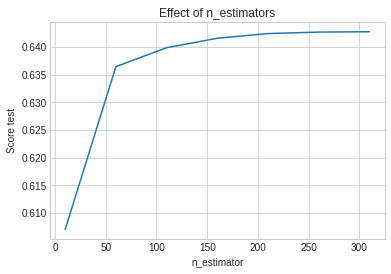

In [266]:
# Con el objetivo de encontrar nu mejor modelo evaluaremos el modelo para diferentes números de estimadores (# de árboles que conformará a RF)
# contra el score de los valores de test que no hacen parte del entrenamiento y con base en esto seleccionaremos el más conveniente.  
# Tambien podriamos hacerlo mediente GridsearchCV, sin embargo no podriamos ver que ocurre con los datos de test. Y como lo que buscamos
# es que el modelo generalice lo mejor posible este método es muy útil.
estimators = np.arange(10, 320, 50)
scores = list()
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, Y_train)
    scores.append(model.score(X_test, Y_test))
                                                                            
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("Score test")
plt.plot(estimators, scores)

In [23]:
# Como se puede observar en la grafica con alredore de 200 árboles ya se logra un resultado consistente.
# por lo cual tomaremos este como el número de árboles a definir en el model final
model.set_params(n_estimators=200)
model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=-1, oob_score=True,
                      random_state=42, verbose=0, warm_start=False)

In [24]:
# Evaluamos el R2 tanto de entrenamiento como de Test
print('R^2 Training Score: {:.3f} \nR^2 Validation Score: {:.3f}'.format(model.score(X_train, Y_train),
                                                                         model.score(X_test, Y_test)))

R^2 Training Score: 0.951 
R^2 Validation Score: 0.646


In [46]:
Y_pred = model.predict(X_test)
Y_pred

array([0.   , 1.05 , 0.675, ..., 1.275, 0.   , 2.475])

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print('MSE ', mean_squared_error(Y_test, Y_pred, squared=False))
print('MAE ', mean_absolute_error(Y_test, Y_pred))

MSE  3.4012333724407435
MAE  1.5846967933114615


In [28]:
# Tanto RF como Decision Trees permiten determinar las features más incidentes en el modelo
# con lo cual las visualizaremos a continuación:
import numpy as np
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::1]
feature_importances = df2.drop(['DEP_DEL15'], axis=1).columns[indices]

In [29]:
feature_importances

Index(['CANCELLED', 'DAY_OF_WEEK', 'OP_CARRIER_AIRLINE_ID', 'DAY_OF_MONTH',
       'DEST_AIRPORT_ID', 'ORIGIN_AIRPORT_ID', 'DISTANCE', 'OP_CARRIER_FL_NUM',
       'ARR_TIME', 'DEP_TIME_BLK', 'DEP_TIME'],
      dtype='object')

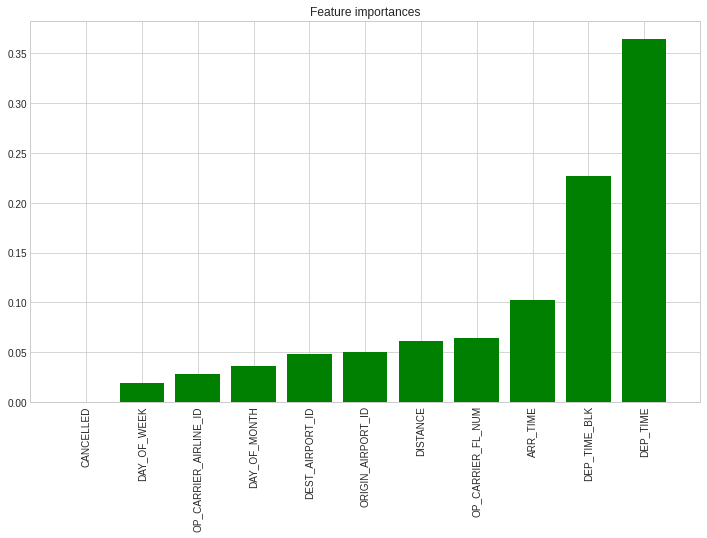

In [32]:
plt.figure(figsize=(12, 7))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="g", align="center")
plt.xticks(range(X.shape[1]), feature_importances, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

Aqui podemos visualizar las variables con mayor incidencia en el modelos siendo la Hora y rago de salida de los vuelos los criterios más reelevantes. Lo cual inidica que los retrasos estan fuertemente ligados con la hora a la cual salen los vuelos. En menor proporción las demas variables tambien influyen como lo son la distancia, la aerolinea el aeropuerto y solo con una muy baja inicidencia algunos dias de la semana.

**Evaluación del Dataset bajo un modelo de clasificación**

Aunque el ejercicio plantea el dataset para la tematica de regresión, seria más conveniente tratarlo como uno de clasificación. Ya que el Target es una salida binaria si el vuelo tuvo o no retraso mayor o igual a 15 minutos. Por lo cual aplicaré el mismo modelo RF pero como clasificador, en el cual se podra obervar como este logra un mayor Accuracy debido a que no requiere asignar un valor definido sino asignarlo a una categoria.

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(n_estimators=20).fit(X_train,Y_train) #Incluso con un número bajo de Trees se logra un buen resultado  

Y_train_pred = rfc.predict(X_train)
Y_test_pred = rfc.predict(X_test)

print('ACCURACY train: %.4f, test: %.4f' %(accuracy_score(Y_train,Y_train_pred), accuracy_score(Y_test,Y_test_pred)))

ACCURACY train: 0.9969, test: 0.9164


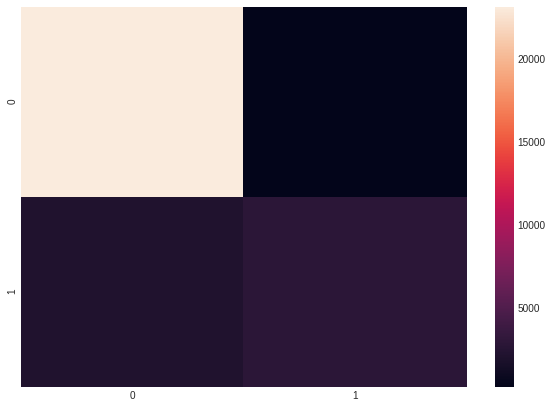

In [34]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# visualizamos la matriz de confiusión de los datos de Test. 
cnf_matrix = confusion_matrix(Y_test, Y_test_pred)
f, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(cnf_matrix, annot=False)
plt.show()

Puede observarse como la clasificación es muy buena, lo cual indica que el dataset esta bien depurado y el modelo logra un accuracy mayor al 91%, siendo asi muy bajo el número de falsos positivos, con un algortimo de clasificación nada complejo. 